In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
%matplotlib inline

In [6]:
%cd /mnt
%cd d
%cd ctrap/data/2019_05_17
%cd 10_nM_YOYO1_plus_minus_1mM_spermine
%cd Kymographs_experiment_1

/mnt
/mnt/d
/mnt/d/ctrap/data/2019_05_17
/mnt/d/ctrap/data/2019_05_17/10_nM_YOYO1_plus_minus_1mM_spermine
/mnt/d/ctrap/data/2019_05_17/10_nM_YOYO1_plus_minus_1mM_spermine/Kymographs_experiment_1


In [100]:
# Sytox binding, unbinding, with decreased, than increased force
filename = r"20190517-172327 Kymograph DNA 5 with dye.h5"

# load file
file = pylake.File(filename)

Look at the contents of the file:

In [8]:
print(file)

File root metadata:
- Bluelake version: 1.5.5
- Description: 
- Experiment: 
- Export time (ns): 1558128207541306100
- File format version: 2
- GUID: {DEC62C63-F0F2-4D3D-8D9A-ECCD156BA7D3}

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 726
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 726
Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 726
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 726
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 726
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 726
Calibration:
  44:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Blue shutter:
  - Data type: uint8
  - Size: 3779569
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Siz

## Make Kymographs

List all the kymographs in the file:

In [101]:
for kymo_name in file.kymos:
    print(kymo_name)


DNA 5 with dye


Load the kymograph in the file:

In [102]:
# you can either do this and then you have to change which kymo you load for every file:
# kymo_data = file.kymos["DNA 5 with dye"] # as this file contains kymograph #7

# ALTERNATIVELY you can either do this and then you don't have to worry about which file you open
kymos = list(file.kymos)
print(kymos)
kymo_data = file.kymos[kymos[0]]
# print(kymo_data)

['DNA 5 with dye']


Plot the red channel:

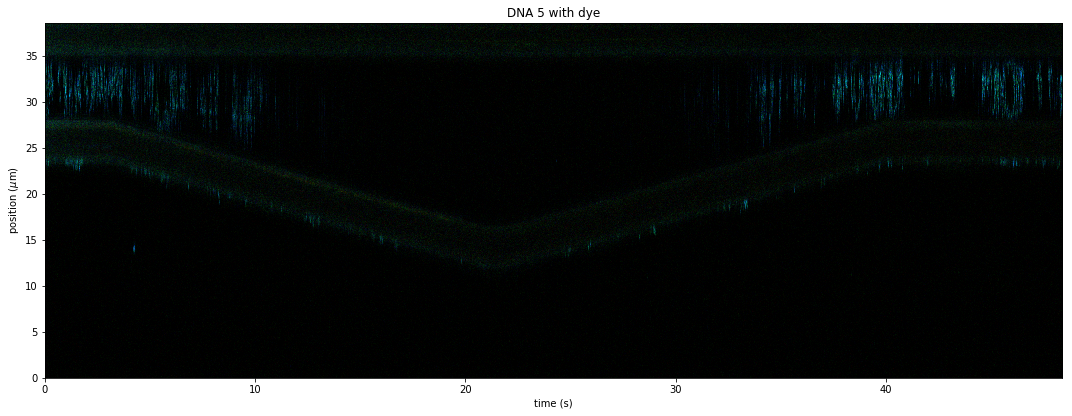

In [103]:
fig = plt.figure(figsize=(15,10))

# here you select the kymo
kymos = list(file.kymos)
kymo = file.kymos[kymos[0]]
kymo.plot_rgb()
plt.tight_layout()

Note that we can also scale the colorbar of the image.

This is not so straightforward, here we just show a very simple way of doing it.

Get the raw data out of the kymographs:

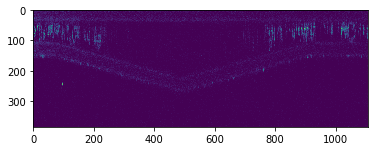

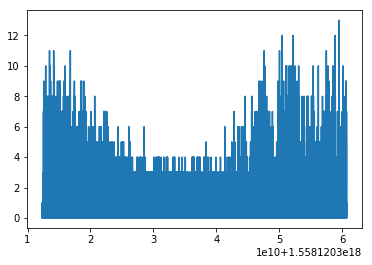

In [104]:
blue_date = kymo.blue_image
green_date = kymo.green_image
red_date = kymo.red_image

# this gives you the timestamps if you want to produce the kymos yourself
timestamps = kymo.timestamps

kymos = list(file.kymos)
kymo = file.kymos[kymos[0]]
fig = plt.figure()
plt.imshow(blue_date)


#low-level raw data
fig = plt.figure()
photons = kymo.blue_photon_count
plt.plot(photons.timestamps, photons.data)
# kymo.save_tiff("KymoTiff.tiff")

Get a sense of the pixel values in the kymos

In [105]:
max_px = np.max(blue_date)
print(max_px)
min_px = np.min(blue_date)
print(min_px)

55
0


In [106]:
for fxn in dir(kymos):
    if not fxn.startswith('_'):
        print(fxn)

append
clear
copy
count
extend
index
insert
pop
remove
reverse
sort


Scale the colorbar and make the kymograph look better:

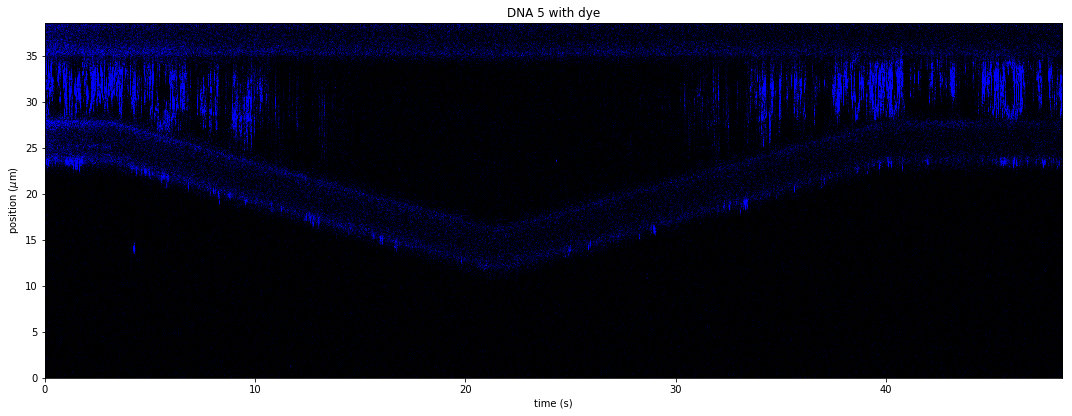

In [107]:
fig = plt.figure(figsize=(15,10))
kymos = list(file.kymos)
kymo = file.kymos[kymos[0]]
kymo.plot_blue(vmax=10)  
plt.tight_layout()

## Force versus Time

Load the data:

In [91]:
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']

# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]

sample_rate = forcex.sample_rate

Downsample the data:

In [92]:
downsampled_rate = 100 # Hz

# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]

Plot Force:

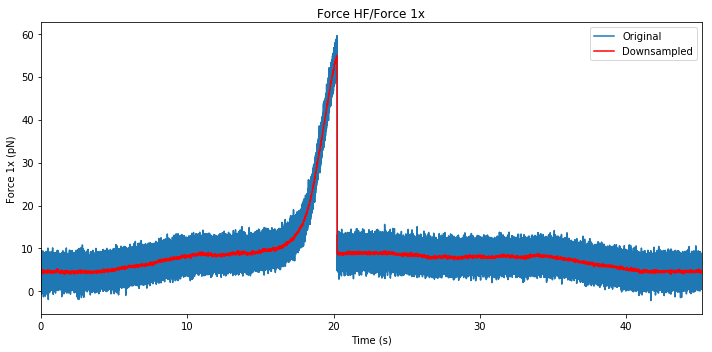

In [93]:
fig = plt.figure(figsize=(10,5))

forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

## Correlated Force and Confocal

Plot the final figure:

We see when we decreased the force on the DNA the Sytox unbound. As soon as we increase the tension back, we see Sytox binding again. At around 52 seconds, the DNA tether broke, which is why the force went back to it’s original position.

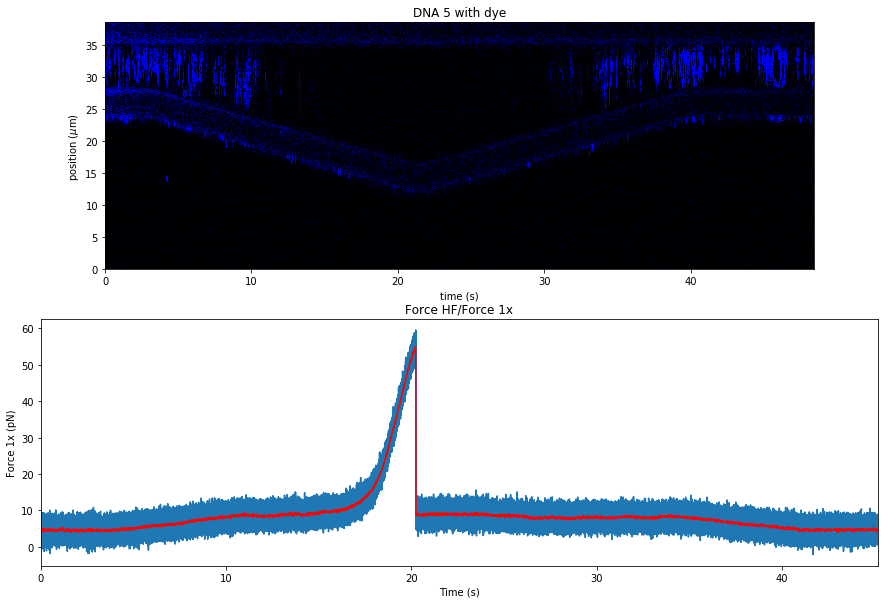

In [122]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
kymo.plot_blue(vmax=10)

# fig = plt.figure(figsize=(15,10))
# fig = plt.figure(figsize=(15,10))
plt.subplot(2, 1, 2)
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.xlim([0,max(time)])
plt.ylabel('Force 1x (pN)')
#plt.tight_layout()
# ax = fig.add_subplot(111, aspect='equal')
#plt.savefig("DNA3",  bbox_inches="tight")
plt.savefig("DNA3_alt.png")


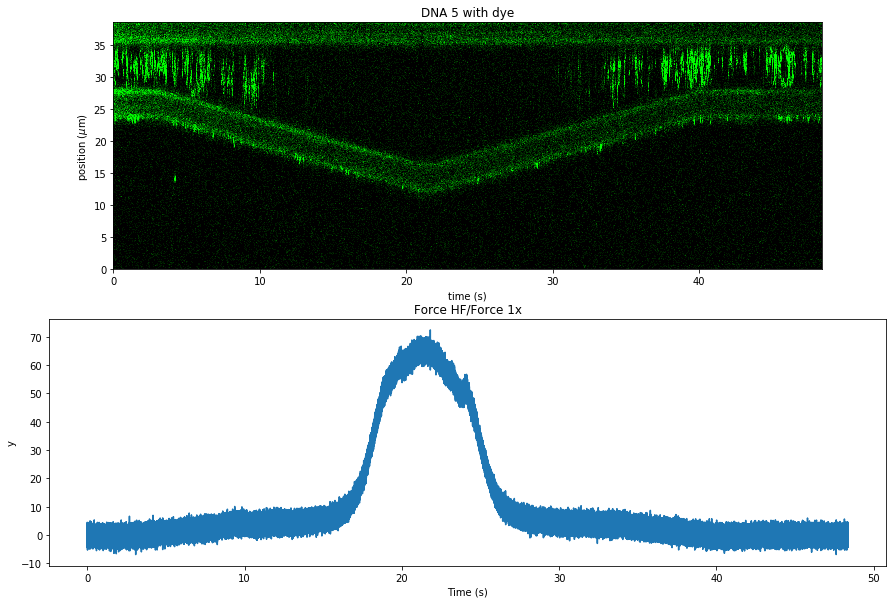

In [65]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(211)
kymo.plot_green(vmax=10)

ax2 = fig.add_subplot(212)
forcex.plot()

# ax = fig.add_subplot(111, aspect='equal')
fig.savefig("temp.png")


Text(0,0.5,'Force 1x (pN)')

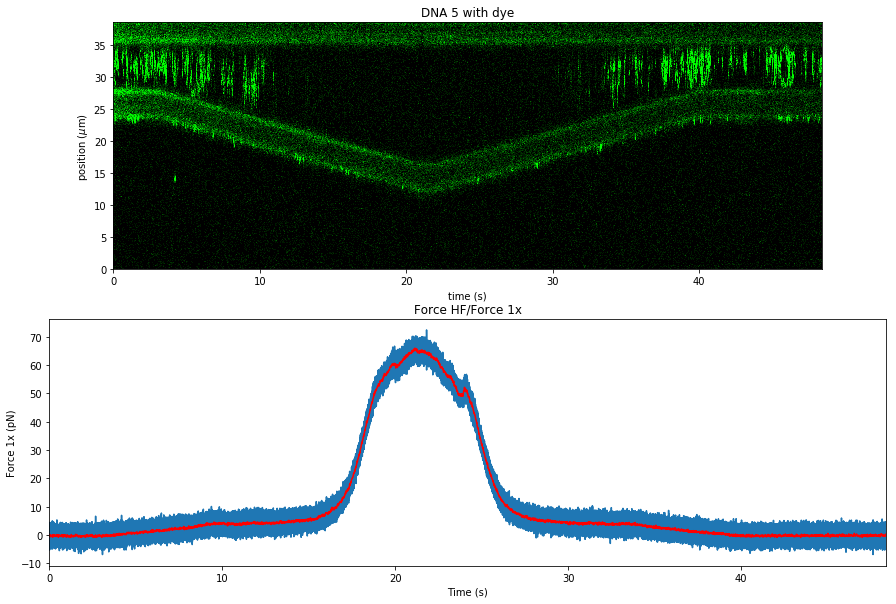

In [81]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
kymo.plot_green(vmax=10)

plt.subplot(2,1,2)
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.xlim([0, max(time)])
plt.ylabel('Force 1x (pN)')

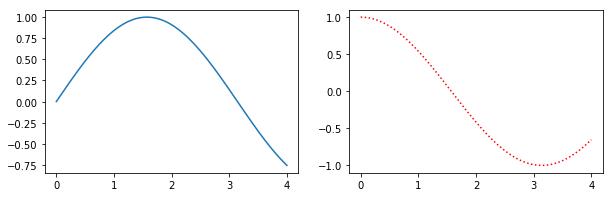

In [58]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
x = np.linspace(0,4,1000)
ax.plot(x, np.sin(x))

ax2.plot(x, np.cos(x), 'r:')